# 📉📊📈**Stock Price Prediction Using Different Machine Learning Models and Compare the Performance of the Models**📉📊📈


# ✅ **Logistic Regression** ✅

In statistics, the logistic model is a statistical model that models the probability of one event taking place by having the log-odds for the event be a linear combination of one or more independent variables. In regression analysis, logistic regression is estimating the parameters of a logistic model.

# **Import Libraries**

In [1]:
# yahoo_finance is used to fetch data 
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 63 kB 1.9 MB/s 
     |████████████████████████████████| 6.4 MB 16.5 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

!pip install yfinance
import yfinance as yf
yf.pdr_override()

# MATPLOTLIB & SEABORN FOR GRAPH-PLOTTING
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# **Load data into a Data Frame**

In [4]:
# input
symbol = 'AMD'
start = '2014-01-01'
end = '2018-08-27'

# Read data 
dataset = yf.download(symbol,start,end)

# Only keep close columns 
dataset.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-01-02,3.85,3.98,3.84,3.95,3.95,20548400
2014-01-03,3.98,4.00,3.88,4.00,4.00,22887200
2014-01-06,4.01,4.18,3.99,4.13,4.13,42398300
2014-01-07,4.19,4.25,4.11,4.18,4.18,42932100
2014-01-08,4.23,4.26,4.14,4.18,4.18,30678700


# **Data Preprocessing**

In [5]:
dataset['Buy_Sell'] = np.where(dataset['Adj Close'].shift(-1) > dataset['Adj Close'],1,-1)

In [6]:
dataset.head()

,Open,High,Low,Close,Adj Close,Volume,Buy_Sell
Date,,,,,,,
2014-01-02,3.85,3.98,3.84,3.95,3.95,20548400,1
2014-01-03,3.98,4.00,3.88,4.00,4.00,22887200,1
2014-01-06,4.01,4.18,3.99,4.13,4.13,42398300,1
2014-01-07,4.19,4.25,4.11,4.18,4.18,42932100,-1
2014-01-08,4.23,4.26,4.14,4.18,4.18,30678700,-1


# **Null value testing and data clearance**

In [9]:
# See how many null values in each column

dataset.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
Buy_Sell     0
dtype: int64

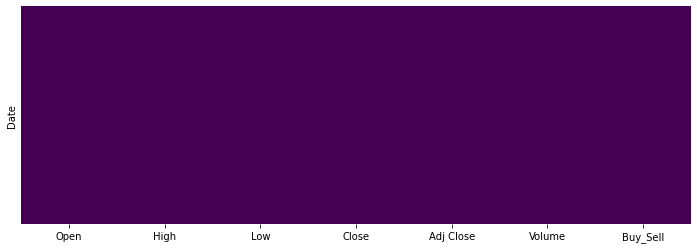

In [10]:
plt.figure(figsize=(12,4))
sns.heatmap(dataset.isnull(), yticklabels=False,cbar=False,cmap='viridis')
plt.savefig("Figure 1: Heatmap for Null Values")